In [22]:
# import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

In [9]:
# load the data
path = os.getcwd()
train = pd.read_csv(path + '/train.csv')
test = pd.read_csv(path + '/test.csv')

In [10]:
# build a label
train['overspend'] = (train.weekly_spending > train.allocated_wage).astype(int)

In [11]:
# check for data imbalances
class_one = len(train[train.overspend == 0])
class_two = len(train[train.overspend == 1])

print('0: %d, 1: %d'%(class_one, class_two))

0: 20110, 1: 9890


In [12]:
# split dataset into variables and balance the label
X = train.drop(['index', 'first_name', 'last_name', 'agency', 'overspend'], axis=1)
X_test = test.drop(['index', 'first_name', 'last_name', 'agency'], axis=1)
y = train.overspend
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X, y)

print(y_sm.value_counts())

1    20110
0    20110
Name: overspend, dtype: int64


In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X_sm, y_sm, test_size=0.2, train_size=0.8, random_state=0)

In [23]:
# scale the training data using a pipeline
pipe = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(max_iter=50000))
pipe.fit(X_train, y_train)

preds = pipe.predict(X_test)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=50000))])

In [24]:
# assess the model with accuracy, recall, and precision
accuracy = metrics.accuracy_score(y_valid, preds)
recall = metrics.recall_score(y_valid, preds)
precision = metrics.precision_score(y_valid, preds)
print('Accuracy score:', accuracy)
print('Recall score:', recall)
print('Precision score:', precision)

Accuracy score: 0.9995027349577325
Recall score: 0.9995093228655545
Precision score: 0.9995093228655545


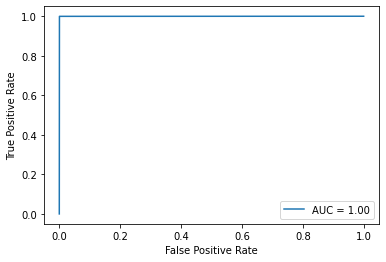

In [16]:
# validate and visualize the model using the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_valid, preds)
roc_auc = metrics.auc(fpr, tpr)
graph = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
graph.plot()
plt.show()

In [18]:
# create the final model
pipe = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(max_iter=50000))
pipe.fit(X, y)
final_preds = pipe.predict(X_test)

In [19]:
# display predictions
output = pd.DataFrame({'first_name': test.first_name, 'last_name': test.last_name, 'overspend': final_preds})
print(output.head())

  first_name   last_name  overspend
0      Kevin      Gibson          1
1      Larry     Lacasse          0
2       Toby      Wester          0
3     Marsha   Constance          0
4      Debra  Buterbaugh          0
